In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words = 10000)

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for key,value in word_index.items()])
decoded_review =  " ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

the description might have variable number of words, hence it is important to pad/clip to a fixed length or multi-hot encode the sequence of integers so that the neural network re

In [4]:
import numpy as np
def vectorize_data(sequences,dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1
  return results



In [5]:
x_train = vectorize_data(train_data,10000)
x_test = vectorize_data(test_data,10000
                        )

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


2024-01-21 21:01:09.921729: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-01-21 21:01:09.921751: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-01-21 21:01:09.921755: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-01-21 21:01:09.921814: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-21 21:01:09.922061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy', metrics=['accuracy'])

In [10]:
x_train.shape

(25000, 10000)

setting aside validation data

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20


2024-01-21 21:01:10.602640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 28ms/step - loss: 0.5169 - accuracy: 0.7883 - val_loss: 0.4120 - val_accuracy: 0.8450
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3194 - accuracy: 0.8988 - val_loss: 0.3095 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2330 - accuracy: 0.9263 - val_loss: 0.2820 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1853 - accuracy: 0.9406 - val_loss: 0.2797 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1499 - accuracy: 0.9523 - val_loss: 0.2847 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1263 - accuracy: 0.9603 - val_loss: 0.2985 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1052 - accuracy: 0.9697 - val_loss: 0.3091 - val_accuracy: 0.8838
Epoch 8/20
30/30 [======

In [13]:
import matplotlib.pyplot as plt


In [14]:
history_dict= history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

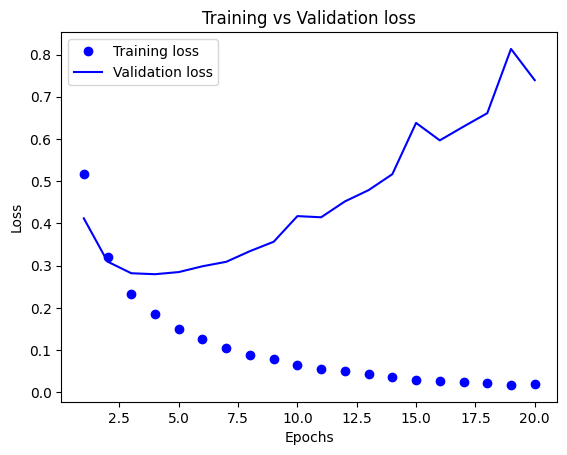

In [15]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label="Training loss")
plt.plot(epochs,val_loss_values,'b',label="Validation loss")
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

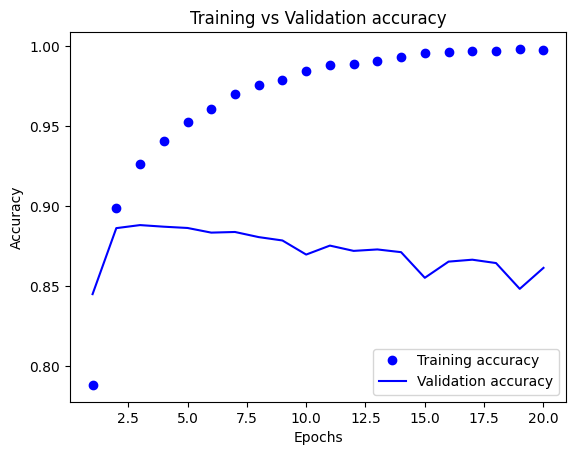

In [16]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,accuracy,'bo',label="Training accuracy")
plt.plot(epochs,val_accuracy,'b',label="Validation accuracy")
plt.title("Training vs Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

After 4 epochs, the model overfits. Another model with training for epochs is constructed and used for evaluation

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4504 - accuracy: 0.8162
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2621 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2026 - accuracy: 0.9275
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3434 - accuracy: 0.8672


In [18]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.0984838 ],
       [0.9999385 ],
       [0.28209135],
       ...,
       [0.07597894],
       [0.03838488],
       [0.34944472]], dtype=float32)

Further experiments:
Add an extra layer in the model with same optimizer and activation

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4686 - accuracy: 0.8074
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2591 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1991 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3237 - accuracy: 0.8756


With the addition of an extra layers, there is not much change in loss or accuracy, in fact loss has worsened (maybe overfitting)

In [20]:
results

[0.32373860478401184, 0.8755599856376648]

replace relu with tanh(another popular activation function)

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4085 - accuracy: 0.8355
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2323 - accuracy: 0.9138
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1769 - accuracy: 0.9346
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3200 - accuracy: 0.8773


with tanh, accuracy is good at 87.53 (seems better than relu with 4 layers)

In [22]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4248 - accuracy: 0.8125
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2454 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1970 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3709 - accuracy: 0.8631


with the number of neurons in each layer increased to 64, the accruacy is still not that high ->implies with this architecture , with addition of number of neurons, there is overfitting in the validation data


In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1495 - accuracy: 0.8071
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0800 - accuracy: 0.9070
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0607 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.0857 - accuracy: 0.8847


with the loss function being replaced with mse, still we are able to get the same results -> implying that the architecture no matter what the activation, loss function, num of layers, number of neurons per layer, the results are comparable

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4800 - accuracy: 0.7996
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2686 - accuracy: 0.9042
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2033 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3133 - accuracy: 0.8779


Multiclass classification problem

In [25]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

In [26]:
len(train_data),len(test_data)

(8982, 2246)

In [27]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for key,value in word_index.items()])
reverse_newswire = " ".join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [28]:
reverse_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [29]:
train_labels[0]

3

In [30]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)


In [31]:
def to_onehot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

In [32]:
y_train = to_onehot(train_labels)
y_test = to_onehot(test_labels)

keras built in api to one-hot encode the labels

In [33]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels, 46)
y_test = to_categorical(test_labels,46)

In [34]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=["accuracy"])

In [36]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [37]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.3607 - accuracy: 0.5455 - val_loss: 1.6366 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3944 - accuracy: 0.7088 - val_loss: 1.3265 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0552 - accuracy: 0.7821 - val_loss: 1.1632 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8354 - accuracy: 0.8320 - val_loss: 1.0285 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6577 - accuracy: 0.8693 - val_loss: 0.9756 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5257 - accuracy: 0.8976 - val_loss: 0.9205 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4189 - accuracy: 0.9186 - val_loss: 0.9560 - val_accuracy: 0.8000
Epoch 8/20
16

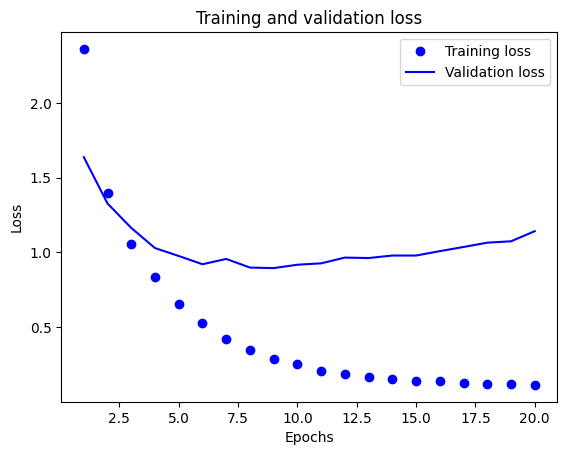

In [38]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

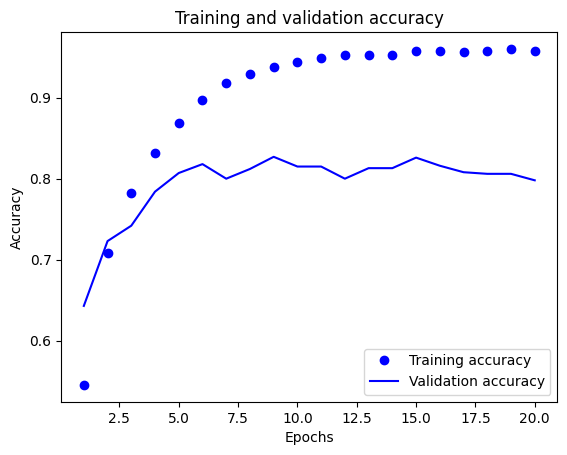

In [39]:

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

after 9 epochs, there is a drop in validation accuracy and validation loss increase

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),

            layers.Dense(64, activation="relu"),
            layers.Dense(46, activation="softmax")
        ])
model.compile(optimizer="rmsprop",
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])
model.fit(x_train,
                  y_train,
                  epochs=9,
                  batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 17ms/step - loss: 2.3615 - accuracy: 0.5404
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3061 - accuracy: 0.7279
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9645 - accuracy: 0.7924
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7468 - accuracy: 0.8430
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.5903 - accuracy: 0.8792
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4650 - accuracy: 0.9058
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3753 - accuracy: 0.9250
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3053 - accuracy: 0.9352
Epoch 9/9
71/71 [==============================] - 1s 8ms/step - loss: 0.9521 - accuracy: 0.7983


In [41]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [42]:
predictions[0].argmax()

3

In [43]:
np.sum(predictions[0])

0.99999994

In [44]:
y_test[0].argmax()

3

another way of handling it is to use categorical label encoding where the labels are stored as integers
the loss function will be replaced with sparsecategorical cross entropy which does the same thing with chagne in interface


In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 3.4341 - accuracy: 0.3052 - val_loss: 3.1774 - val_accuracy: 0.4060
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 2.9140 - accuracy: 0.4245 - val_loss: 2.6392 - val_accuracy: 0.4410
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 2.3964 - accuracy: 0.4500 - val_loss: 2.2344 - val_accuracy: 0.4470
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 2.0441 - accuracy: 0.4672 - val_loss: 2.0397 - val_accuracy: 0.4680
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.8297 - accuracy: 0.4887 - val_loss: 1.9406 - val_accuracy: 0.5030
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 1.6640 - accuracy: 0.5174 - val_loss: 1.7867 - val_accuracy: 0.5130
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 1.5170 - accuracy: 0.5682 - val_loss: 1.7455 - val_accuracy: 0.6120
Epoch 8/20
63

with a reduction in size of intermediate layer ->4 which is much less than 46, there is a drop in accuracy of 8 percent. because not engouh neurons to learn the representations

Further experiments : increase depth, increase /decrease number of neurons per layer

In [46]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 18ms/step - loss: 1.8005 - accuracy: 0.6096 - val_loss: 1.3154 - val_accuracy: 0.7130
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0010 - accuracy: 0.7783 - val_loss: 1.0533 - val_accuracy: 0.7640
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 0.6747 - accuracy: 0.8548 - val_loss: 1.0053 - val_accuracy: 0.7930
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 0.4618 - accuracy: 0.9037 - val_loss: 0.9279 - val_accuracy: 0.8050
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 0.3357 - accuracy: 0.9290 - val_loss: 1.0714 - val_accuracy: 0.7920
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.2631 - accuracy: 0.9422 - val_loss: 1.0251 - val_accuracy: 0.8130
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.2229 - accuracy: 0.9470 - val_loss: 1.1220 - val_accuracy: 0.7890
Epoch 8/20
63

with decrease in number of neurons to 32 in intermediate layer, there is a small drop in accuracy though not very much. with neuron count increased to 128, it is still 79.5 which is close to original accuracy -> this parameter affects the accuracy but not considerably
Taking out one intermediate layer also does not disturb the model much, in fact the accuracy is still 80 perent on validation dataset

increase in number of layers, i.e depth of the model is worse , it decreases val accuracy by 2 percent -> due to overfitting

Regression problem - Boston housing price dataset

In [48]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data,test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [49]:
train_data.shape

(404, 13)

In [50]:
test_data.shape

(102, 13)

In [51]:
train_data[0
           ]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

the 13 features are of different scales and hence we will have to do feature normalization to make learning more stable and easier
also, the number of samples are very low compared to classification problems. 

In [52]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

the targets are median house values in thousands of dollars

In [53]:
train_targets.min(), train_targets.max()

(5.0, 50.0)

Normalization of data - subtract from column mean and divide by column std

In [54]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [57]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse',metrics = ['mae'])
    return model

Splitting of training and validation data

In [65]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):

    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] 
    partial_train_data = np.concatenate(
[train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],

axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,



epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [66]:
all_scores

[4.30392599105835, 3.2276604175567627, 3.85674786567688, 5.291245937347412]

In [67]:
np.mean(all_scores)

4.169895052909851

4000 dollars off is quite high,hence we will train for a longer period of time -> increase the number of epochs and then also log the validation loss for every epoch

In [69]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold # {i}")
    val_data = train_data[i*(num_val_samples):(i+1)*num_val_samples]
    val_targets = train_targets[i*(num_val_samples):(i+1)*num_val_samples]
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data = (val_data, val_targets), epochs = num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)



Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [70]:
average_mae = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

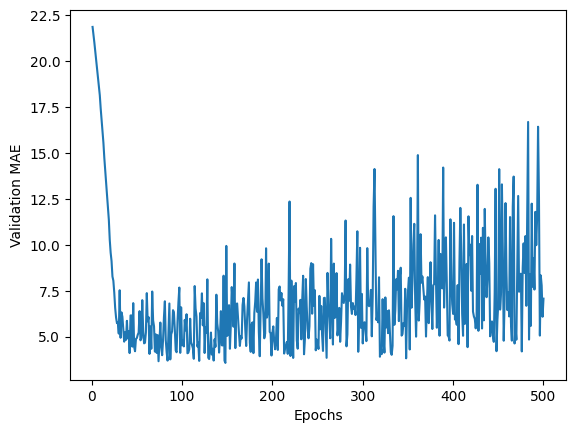

In [71]:
plt.plot(range(1, len(average_mae) + 1), average_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

the first few epochs has high mae and can be omitted for better observatiob of data

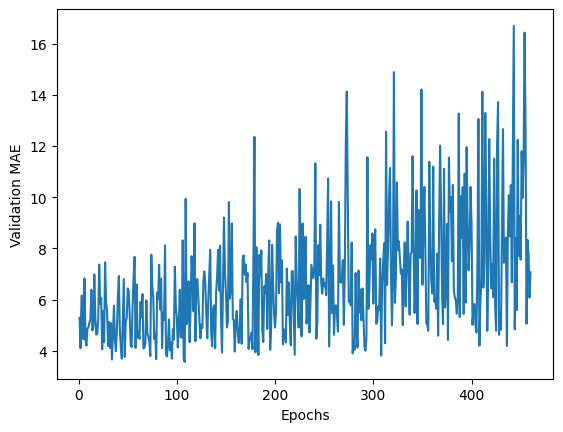

In [74]:
truncated_mae_history = average_mae[40:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

after around 120 epochs, validation mae is increasing implying overfitting , so it will be restricted to 130 epochs, also the irregula shape is perhaps due to mae visualization

In [75]:
model = build_model() 
model.fit(train_data, train_targets,

epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 70ms/step - loss: 18.8313 - mae: 3.3647


In [78]:
test_mae_score

3.3646862506866455

the test mae score is around 3364 dollars which is still a bit high , more experiments with difference in number of layer and difference in number of neurons per layer can be experiments

In [79]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 6ms/step


array([7.2445655], dtype=float32)

In [80]:
test_targets[0]

7.2

In [81]:
predictions[1], test_targets[1]

(array([20.661139], dtype=float32), 18.8)